In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=250
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
#load the data

df = pd.read_csv(r"C:\Users\Prerana\Downloads\crime_data (1).csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


EDA

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.duplicated().sum()

0

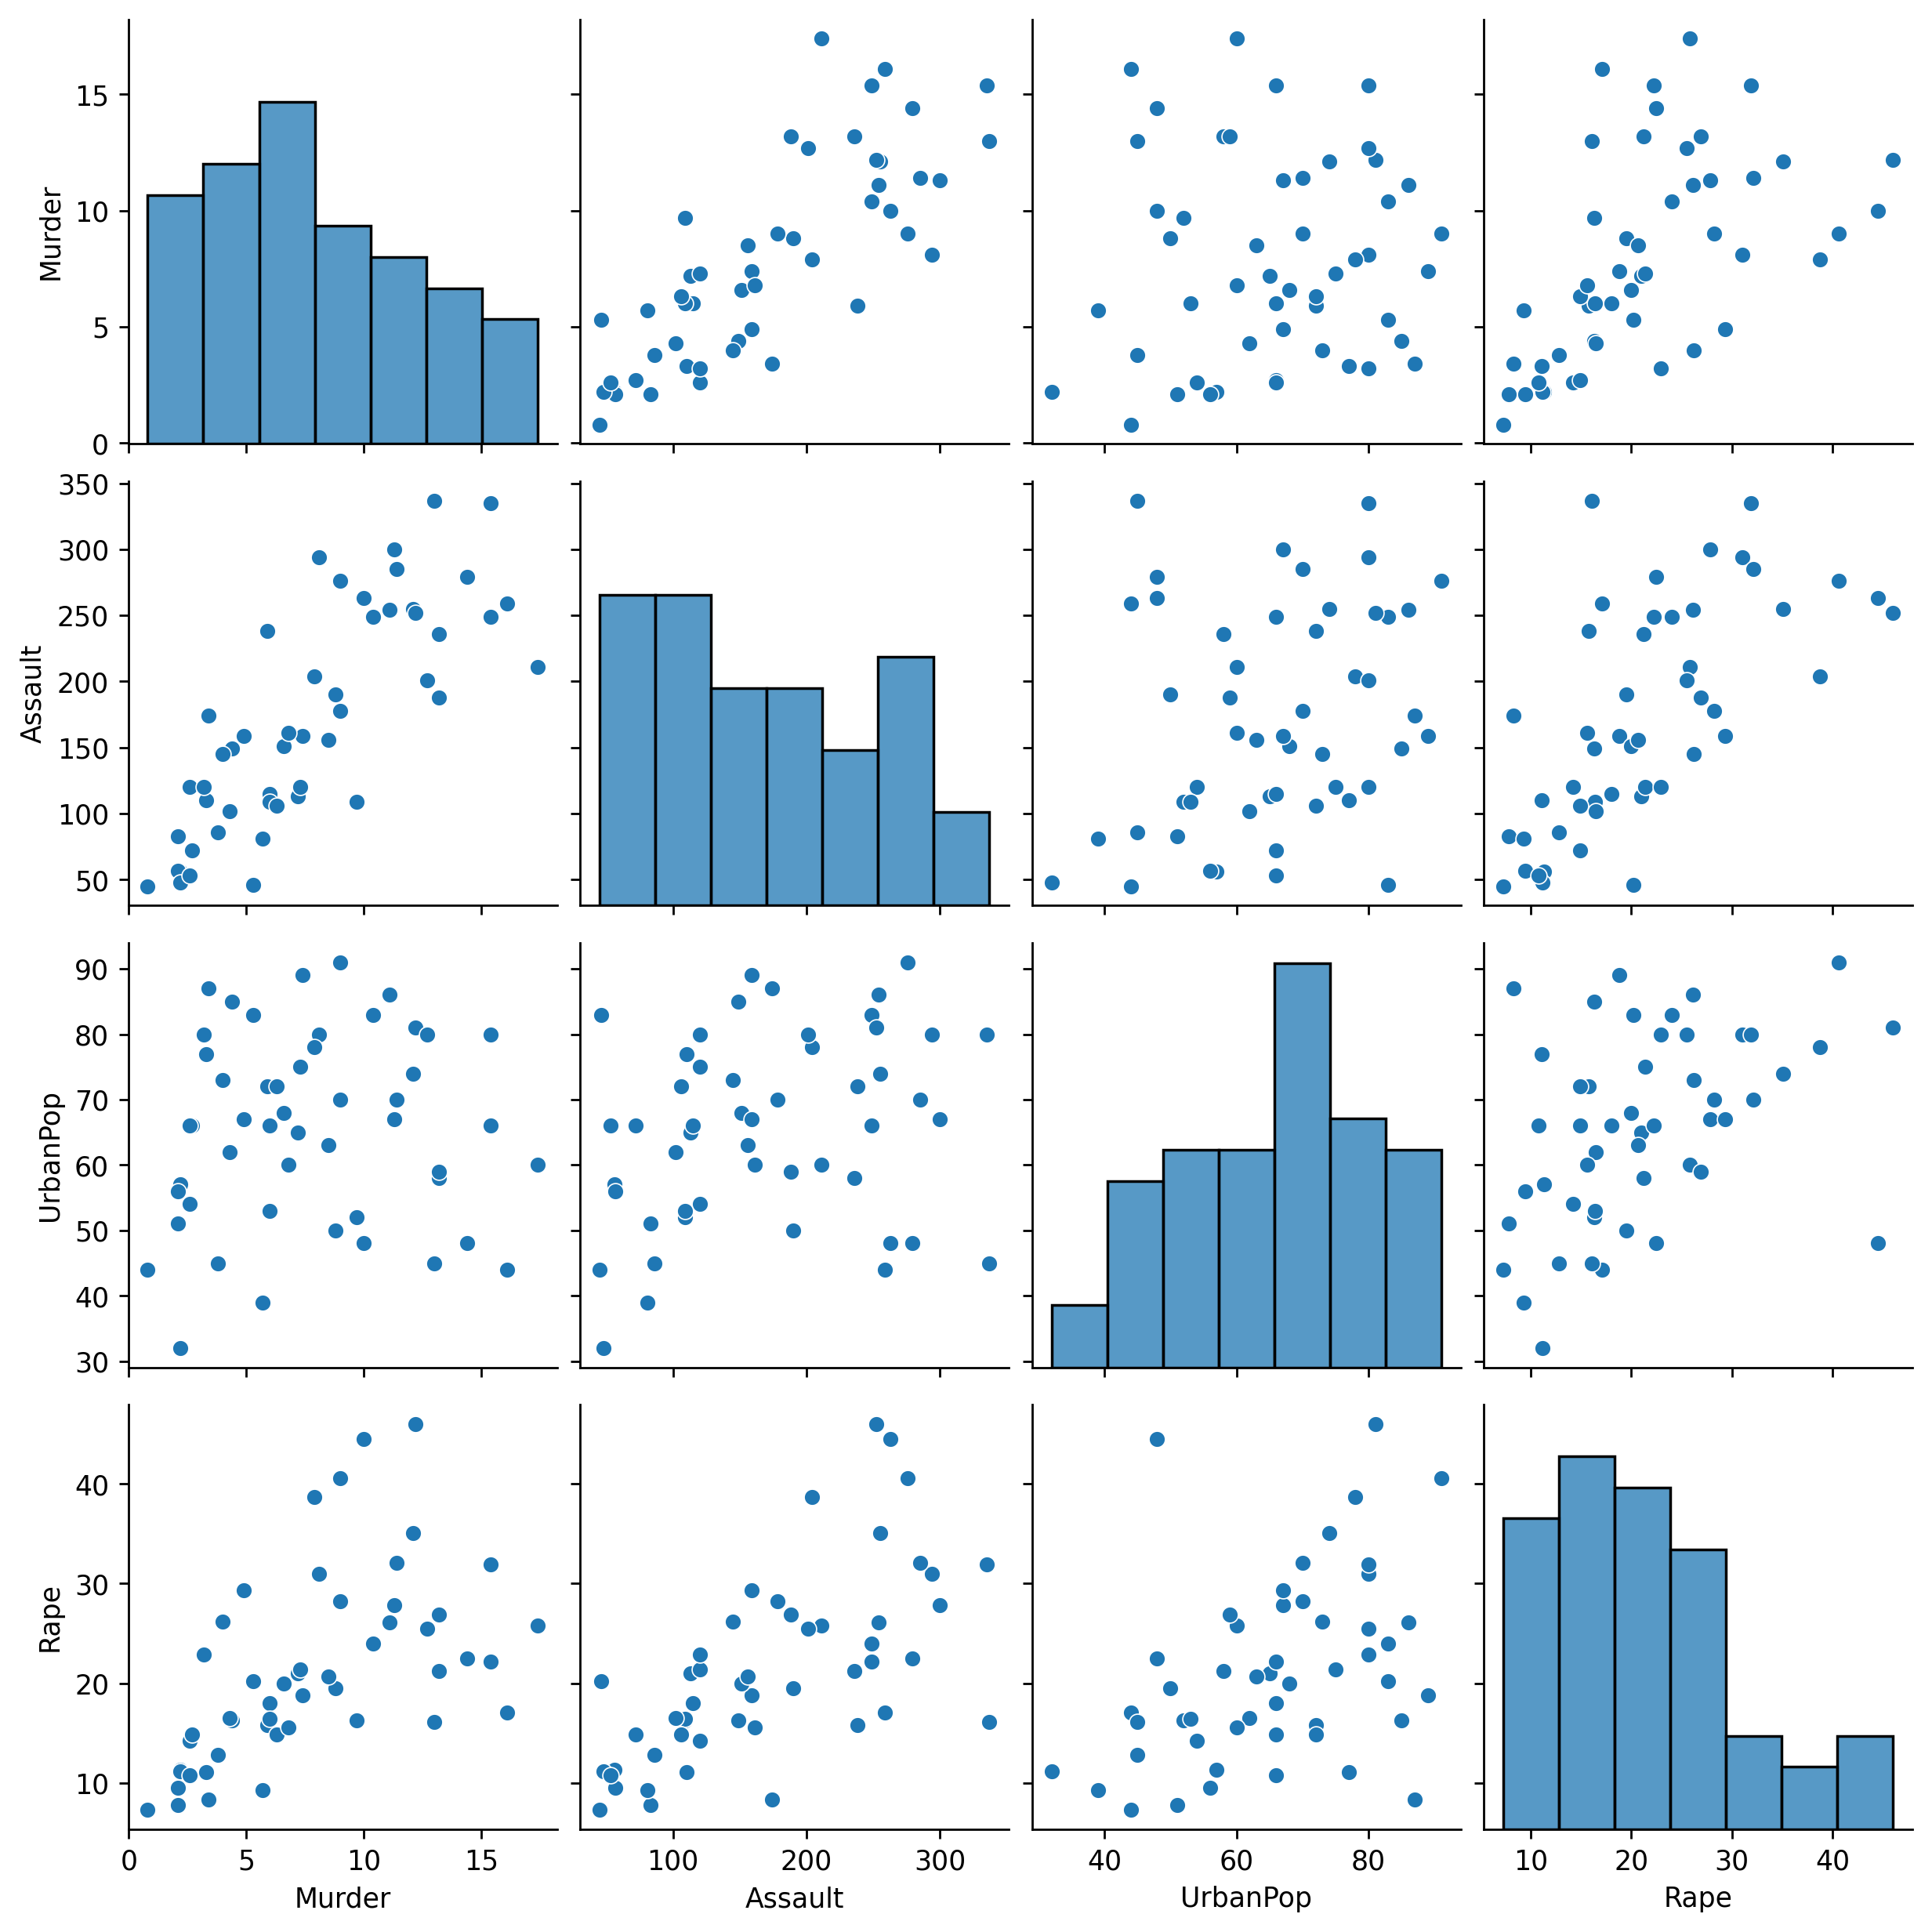

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

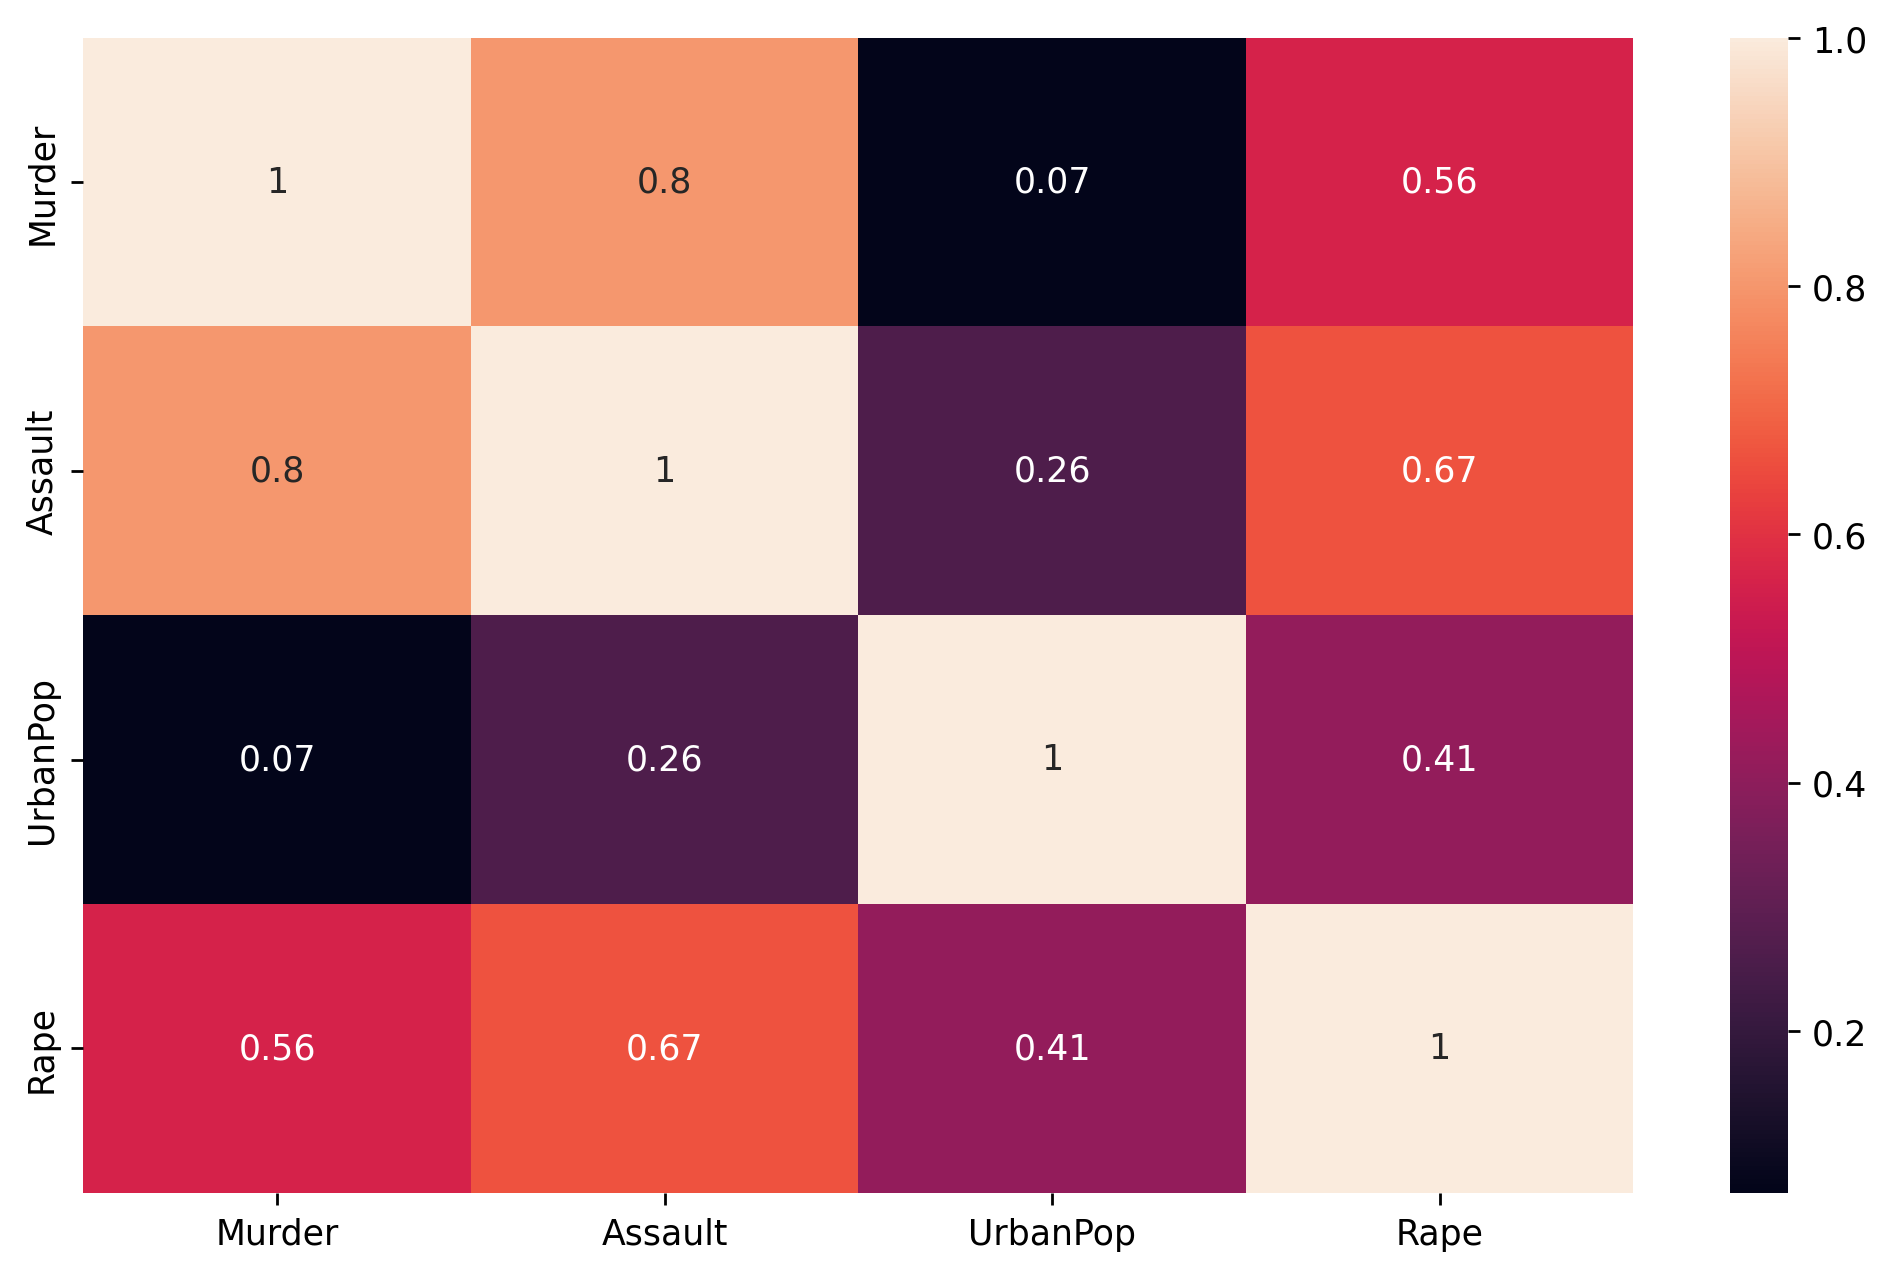

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
x = df.drop(columns=['Unnamed: 0'])
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [11]:
#Standardization

sc = StandardScaler()

x = sc.fit_transform(x)

# Hierarchical Clustering

Text(0.5, 1.0, 'Single Linkage Dendogram')

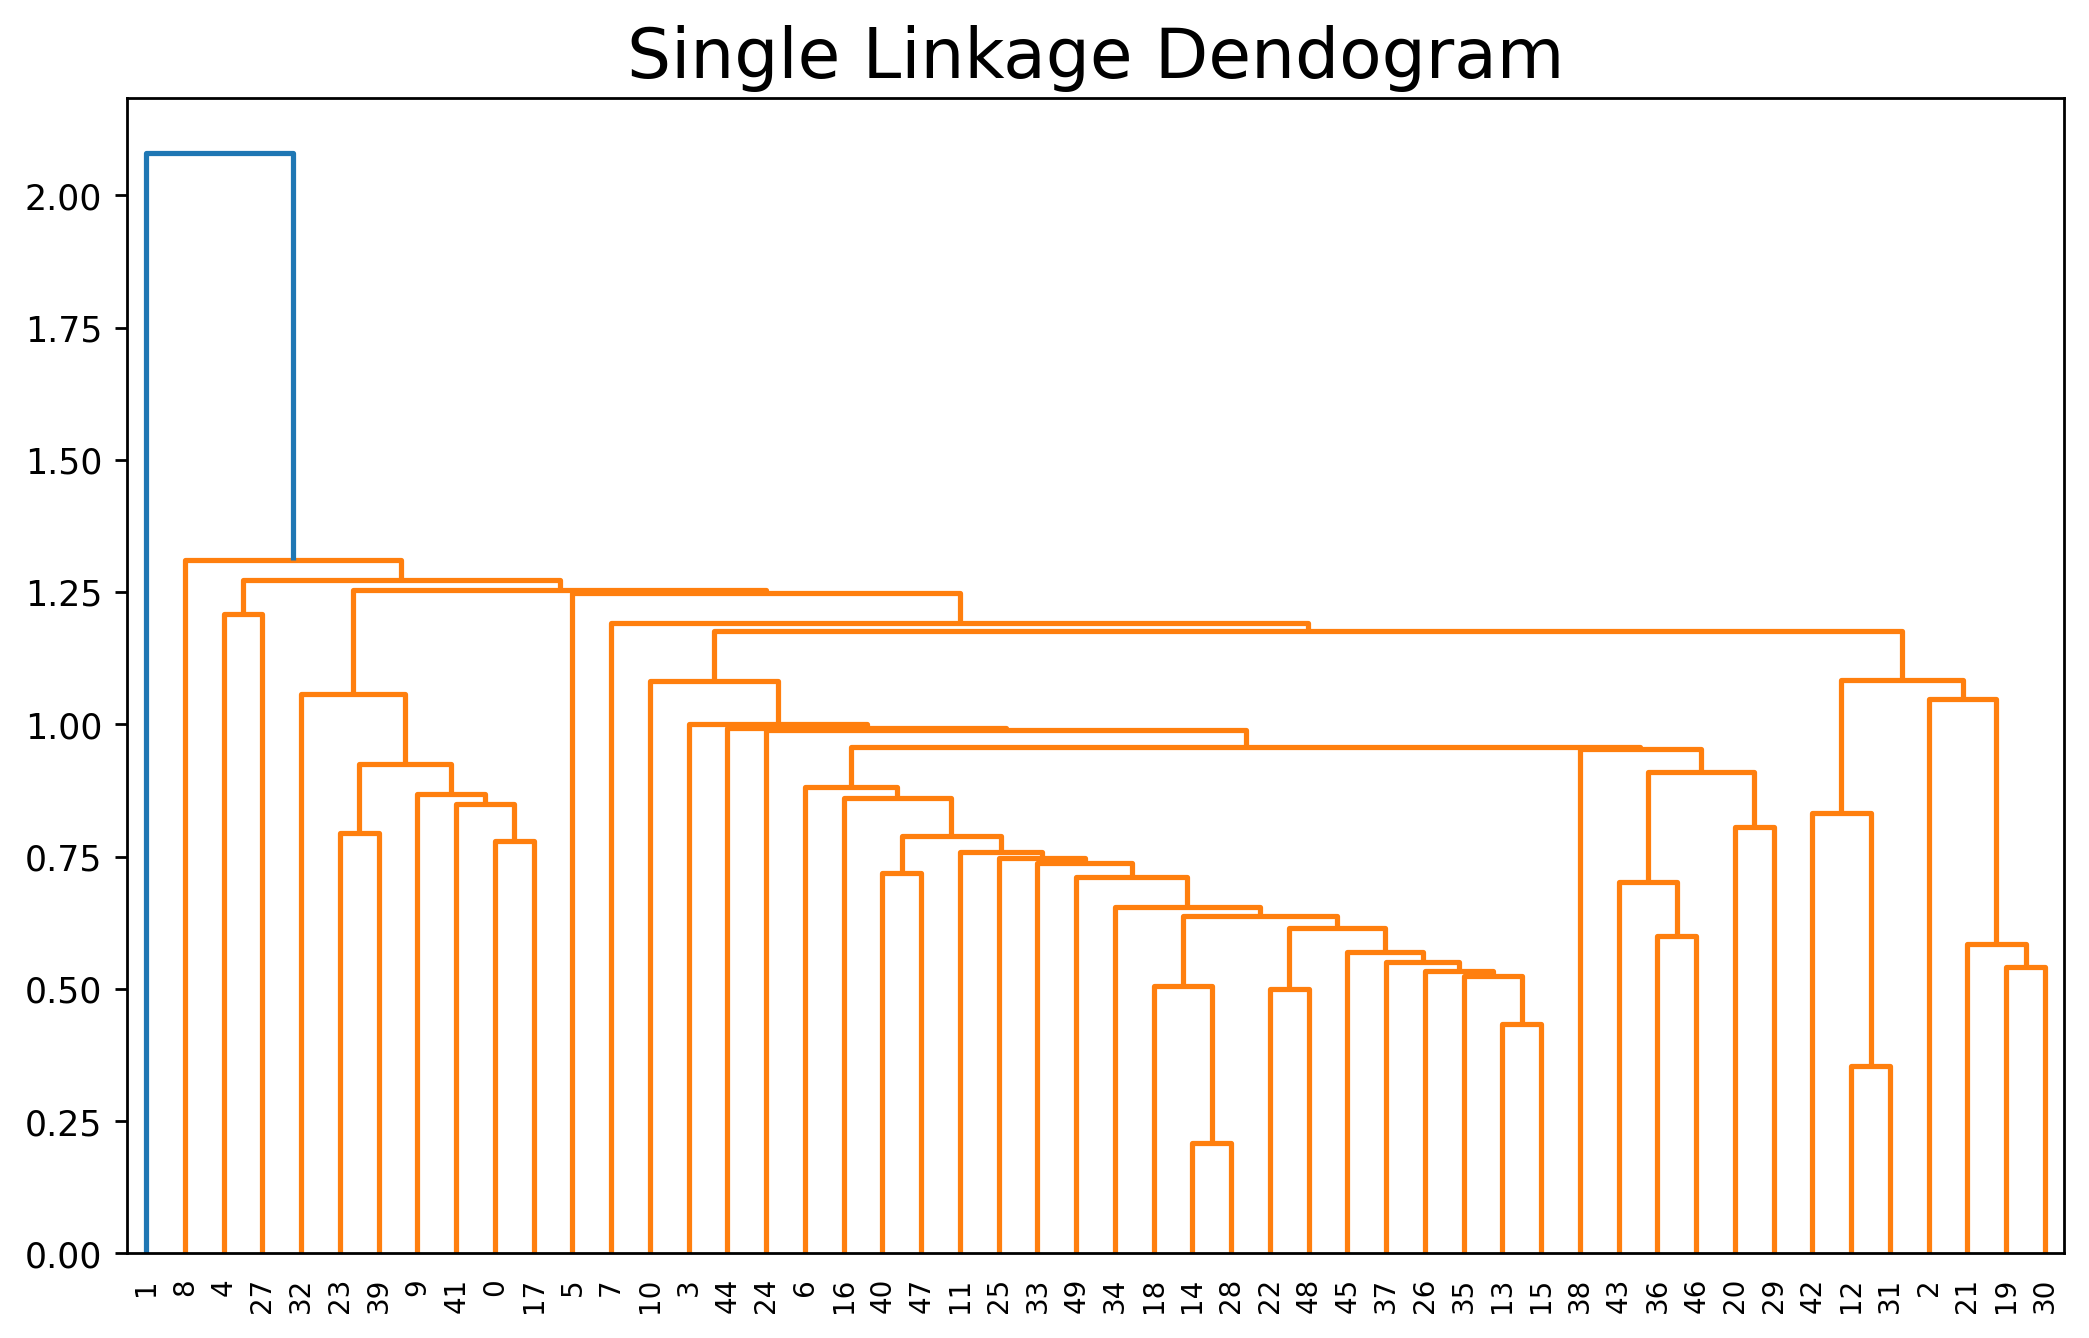

In [12]:
dendogram = sch.dendrogram(sch.linkage(x, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Ward Linkage Dendogram')

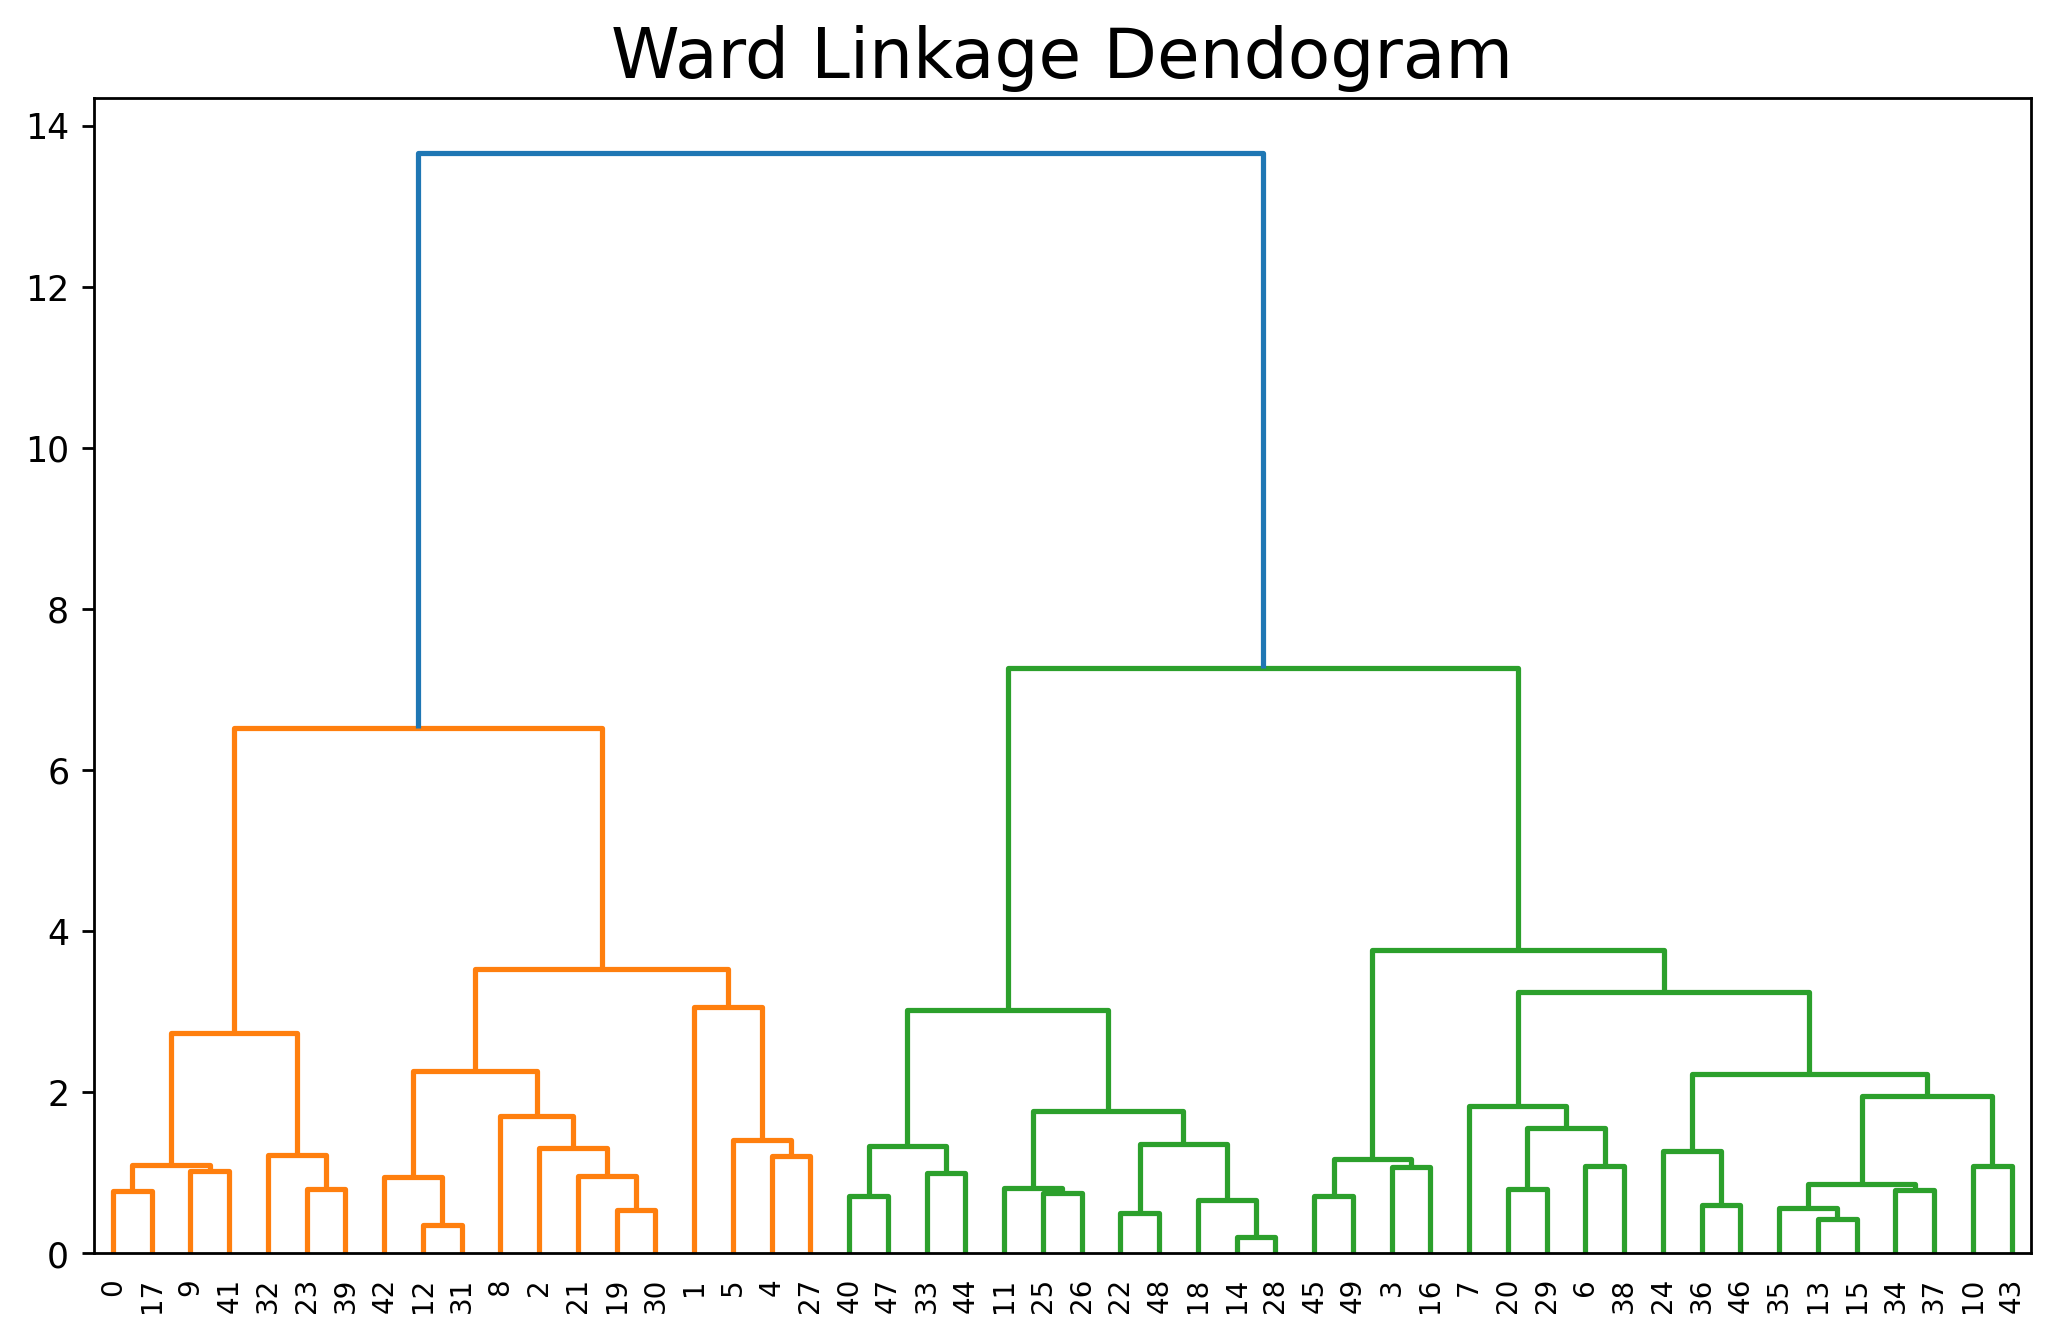

In [13]:
dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Ward Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

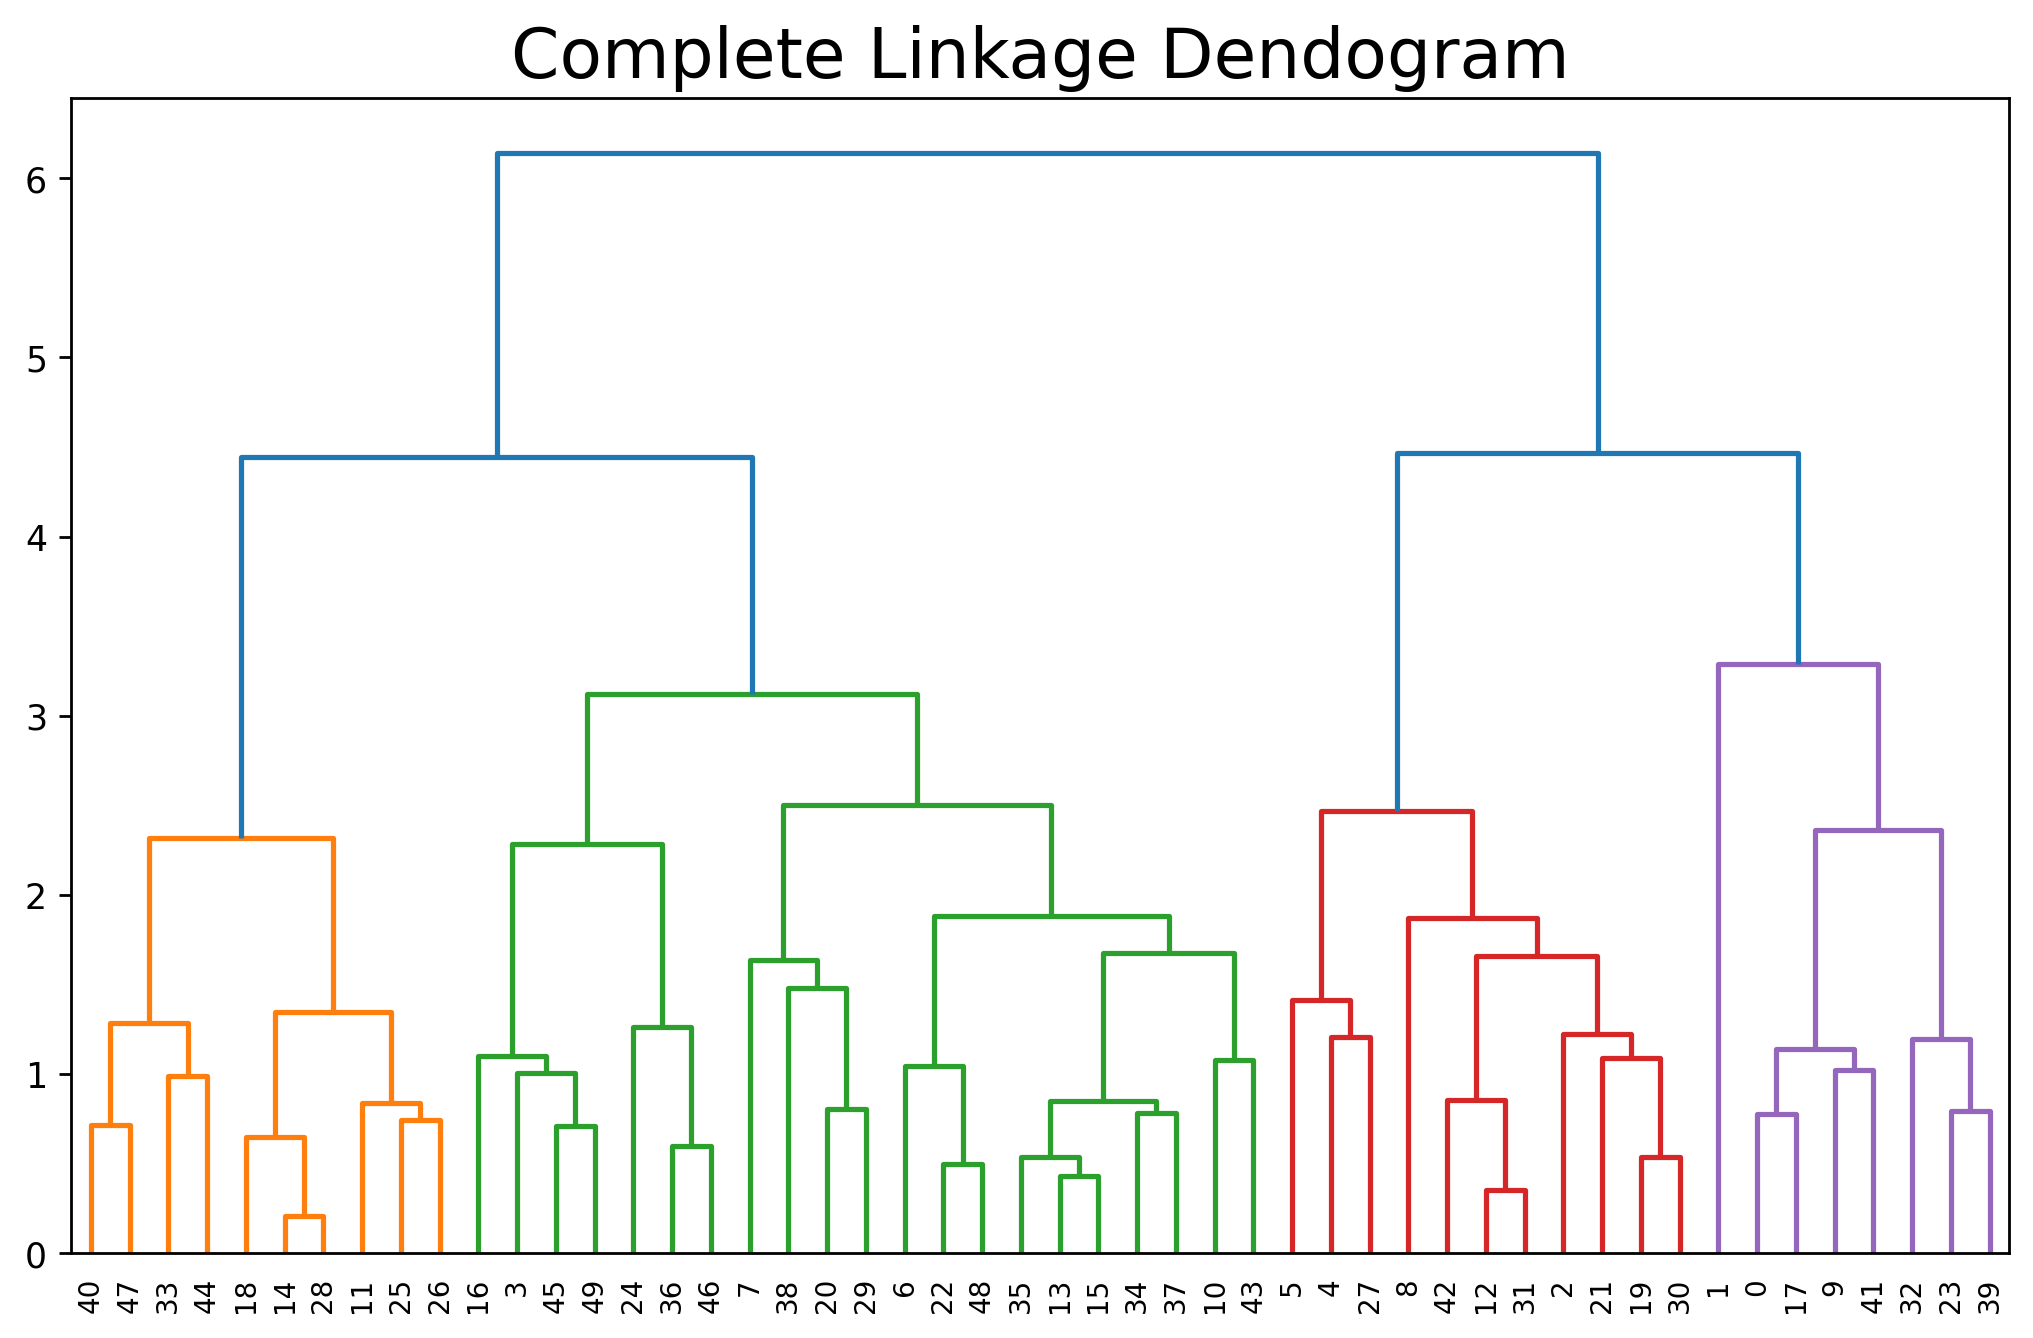

In [14]:
dendogram = sch.dendrogram(sch.linkage(x, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Average Linkage Dendogram')

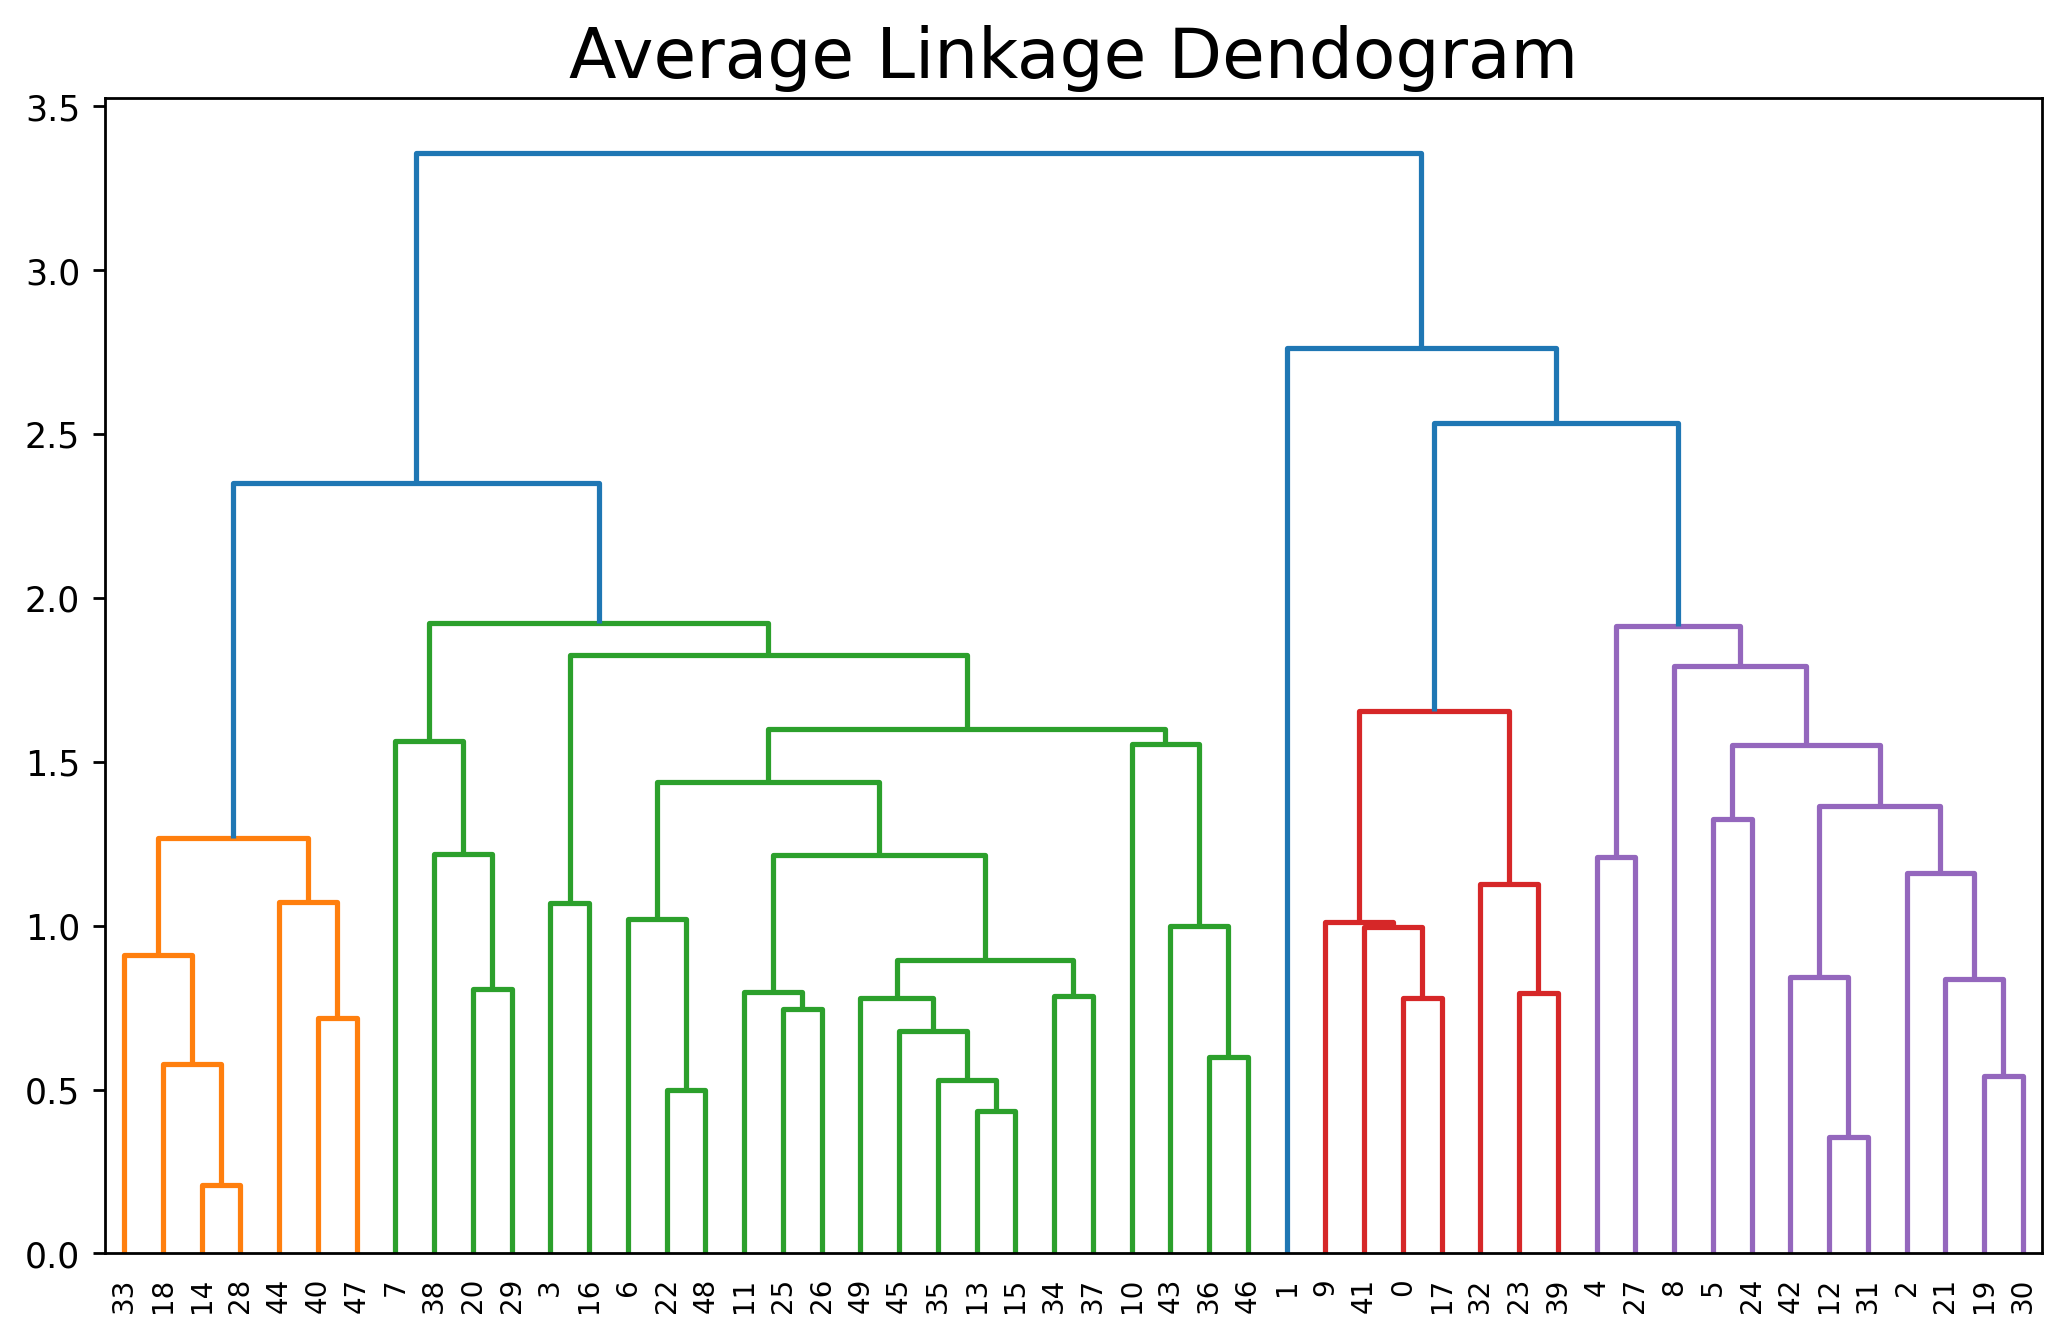

In [15]:
dendogram = sch.dendrogram(sch.linkage(x, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20)

In [16]:
hc = AgglomerativeClustering(n_clusters=4 , affinity= 'euclidean',linkage='ward')

y = hc.fit_predict(x)

In [17]:
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [18]:
Clusters = pd.DataFrame({ 'Cluster':y})

In [19]:
Clusters

,Cluster
0,3
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


# KMeans

In [20]:
wcss = []

for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=12)
    km.fit(x)
    wcss.append(km.inertia_)

In [21]:
wcss

[104.96163315756871,
 79.95548163171662,
 57.55425863091104,
 50.05119672966492,
 43.74655557175967,
 39.04129249497443,
 36.51038004793847,
 31.074730757717184,
 28.411528116083336]

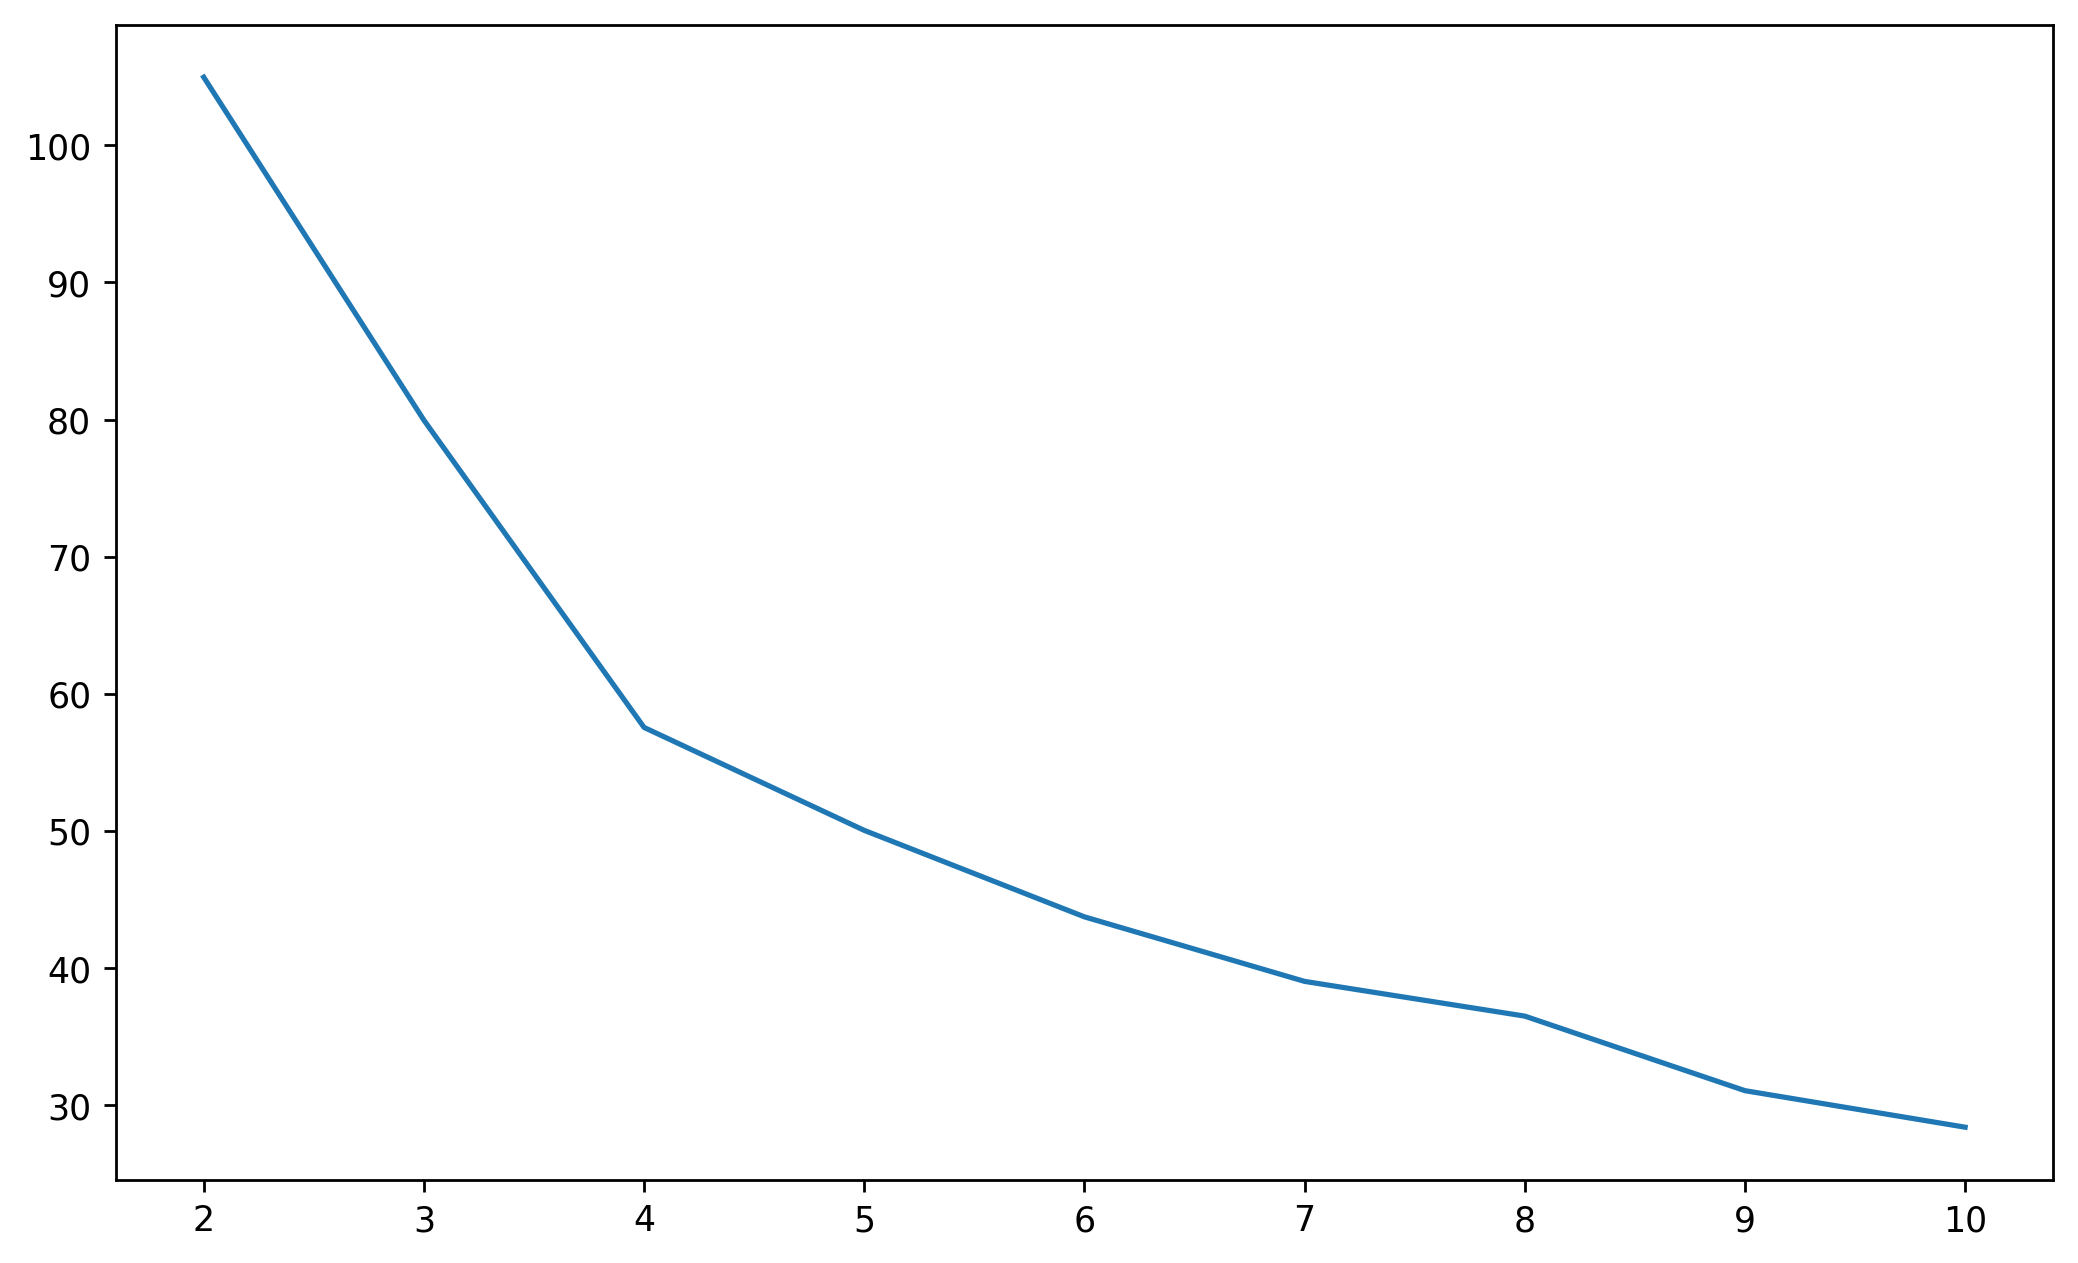

In [22]:
plt.plot(range(2,11),wcss)

In [23]:
km = KMeans(n_clusters=4 , random_state=42)
ypred = km.fit_predict(x)
ypred

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [24]:
df['Cluster'] = ypred
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [25]:
df['Cluster'].value_counts()

0    16
2    13
3    13
1     8
Name: Cluster, dtype: int64

# DBSCAN

In [26]:
db = DBSCAN(eps=0.9, min_samples=5)

db.fit_predict(x)

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [27]:
db.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [28]:
c=pd.DataFrame(db.labels_,columns=['cluster'])
c

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [29]:
pd.concat([df,c],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster,cluster
0,Alabama,13.2,236,58,21.2,1,-1
1,Alaska,10.0,263,48,44.5,2,-1
2,Arizona,8.1,294,80,31.0,2,-1
3,Arkansas,8.8,190,50,19.5,1,-1
4,California,9.0,276,91,40.6,2,-1
5,Colorado,7.9,204,78,38.7,2,-1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,2,-1
9,Georgia,17.4,211,60,25.8,1,-1


Conclusion

DBSCAN and Hierarchical clustering (average) works better.